In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5] #2-d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

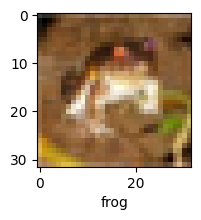

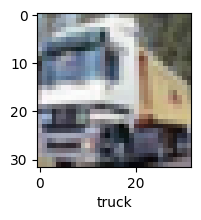

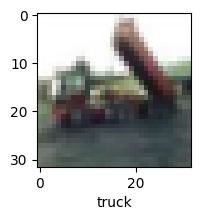

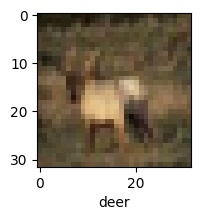

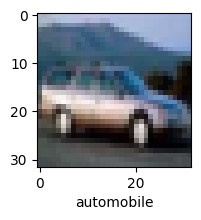

In [ ]:
for i in range(5):
  plot_sample(X_train,y_train,i)

In [ ]:
X_train=X_train/255
X_test=X_test/255

## ANN

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2754 - loss: 2.2337
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.3915 - loss: 1.6834
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4316 - loss: 1.5903
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4484 - loss: 1.5458
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4616 - loss: 1.4996


In [ ]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4737 - loss: 1.4826


[1.4900163412094116, 0.4715999960899353]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      1000
           1       0.60      0.59      0.60      1000
           2       0.39      0.26      0.31      1000
           3       0.34      0.34      0.34      1000
           4       0.41      0.44      0.42      1000
           5       0.36      0.38      0.37      1000
           6       0.54      0.43      0.48      1000
           7       0.43      0.64      0.51      1000
           8       0.56      0.62      0.59      1000
           9       0.58      0.49      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



## CNN

In [ ]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.3716 - loss: 1.7232
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6458 - loss: 1.0134
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6774 - loss: 0.9220
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7035 - loss: 0.8517
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7239 - loss: 0.7963
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7428 - loss: 0.7392
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7604 - loss: 0.6900
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7732 - loss: 0.6526
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7840 - loss: 0.6224


In [ ]:
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.86      0.76      0.81      1000
           2       0.53      0.64      0.58      1000
           3       0.52      0.48      0.50      1000
           4       0.74      0.49      0.59      1000
           5       0.60      0.59      0.60      1000
           6       0.75      0.78      0.76      1000
           7       0.69      0.77      0.73      1000
           8       0.73      0.86      0.79      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [ ]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]
y_test=y_test.reshape(-1,)

cat
ship
ship
airplane
frog
frog
automobile
frog
cat
automobile


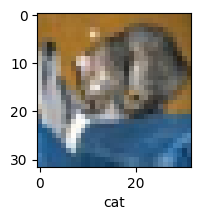

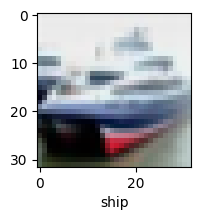

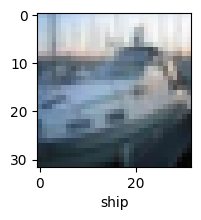

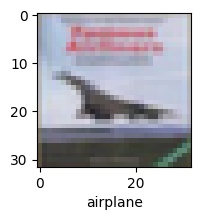

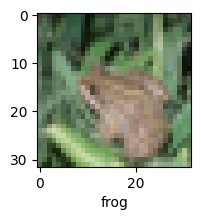

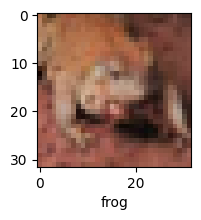

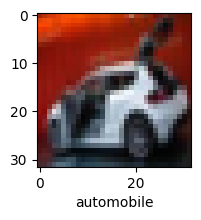

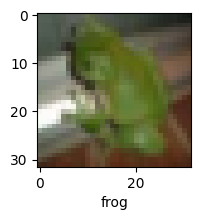

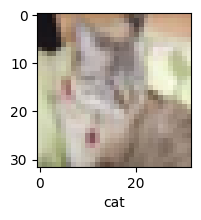

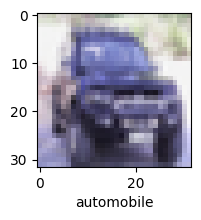

In [ ]:
for i in range(10):
     print(classes[y_classes[i]])
     plot_sample(X_test,y_test,i)